#Question 1: What is Simple Linear Regression?
Simple Linear Regression is a statistical method used to model the relationship between a dependent variable \( y \) and an independent variable \( x \) by fitting a straight line. The equation \( y = \beta_0 + \beta_1 x + \epsilon \) represents this line, where \( \beta_0 \) is the intercept, \( \beta_1 \) is the slope, and \( \epsilon \) is the error term. The goal is to estimate \( \beta_0 \) and \( \beta_1 \) so that the line best fits the observed data.

#Question 2: What are the key assumptions of Simple Linear Regression?
The key assumptions of Simple Linear Regression are:
1. Linearity: The relationship between the independent variable \( x \) and the dependent variable \( y \) is linear.
2. Independence: The residuals (errors) are independent of each other.
3. Homoscedasticity: The residuals have constant variance at every level of \( x \).
4. Normality: The residuals are normally distributed.

#Question 3: What is heteroscedasticity, and why is it important to address in regression models?
Heteroscedasticity refers to the situation where the variance of the residuals (errors) is not constant across all levels of the independent variable \( x \). In regression models, this violates the assumption of homoscedasticity. Addressing heteroscedasticity is important because it can lead to inefficient estimates, biased standard errors, and unreliable hypothesis tests, which may affect the validity of the model's conclusions.

#Question 4: What is Multiple Linear Regression?
Multiple Linear Regression is a statistical technique used to model the relationship between a dependent variable \( y \) and two or more independent variables \( x_1, x_2, \ldots, x_p \). The model is represented by the equation \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p + \epsilon \), where \( \beta_0 \) is the intercept, \( \beta_1, \beta_2, \ldots, \beta_p \) are the coefficients for each independent variable, and \( \epsilon \) is the error term. This method allows for the analysis of how multiple factors simultaneously influence the outcome variable.

#Question 5: What is polynomial regression, and how does it differ from linear regression?
Polynomial regression is a form of regression analysis in which the relationship between the independent variable \( x \) and the dependent variable \( y \) is modeled as an \( n \)-th degree polynomial. The general equation is \( y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n + \epsilon \). Unlike simple linear regression, which fits a straight line to the data, polynomial regression can fit curves, allowing it to capture non-linear relationships between variables.

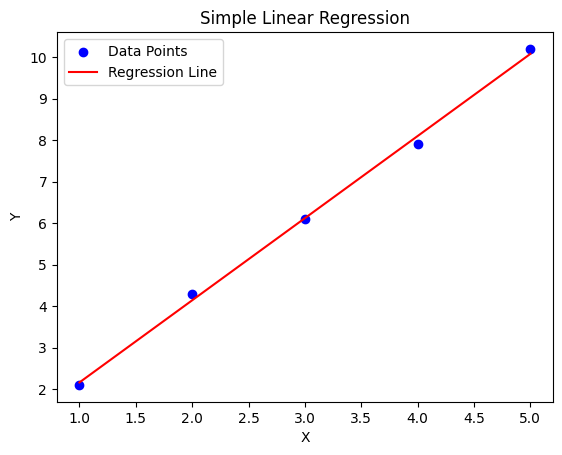

In [2]:
'''Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.'''


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit Simple Linear Regression
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

In [7]:
'''Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.'''

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Sample data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Prepare DataFrame
df_mlr = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})

# Features and target
X_mlr = df_mlr[['Area', 'Rooms']]
y_mlr = df_mlr['Price']

# Fit Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_mlr, y_mlr)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_mlr.columns
vif_data['VIF'] = [variance_inflation_factor(X_mlr.values, i) for i in range(X_mlr.shape[1])]

print("VIF Results:")
print(vif_data)

VIF Results:
  feature         VIF
0    Area  127.796923
1   Rooms  127.796923


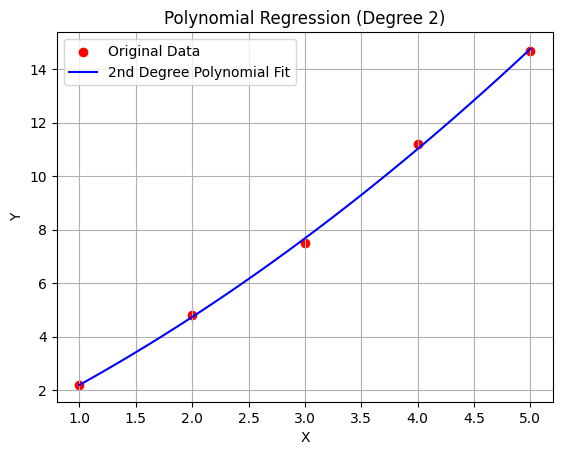

In [9]:
'''Question 8: Implement polynomial regression on the following data: ● X = [1, 2, 3, 4, 5] ● Y = [2.2, 4.8, 7.5, 11.2, 14.7] Fit a 2nd-degree polynomial and plot the resulting curve'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Prepare data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Step 2: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 3: Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Step 4: Predict
X_plot = np.linspace(1, 5, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
Y_plot = model.predict(X_plot_poly)

# Step 5: Plot
plt.scatter(X, Y, color='red', label='Original Data')
plt.plot(X_plot, Y_plot, color='blue', label='2nd Degree Polynomial Fit')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


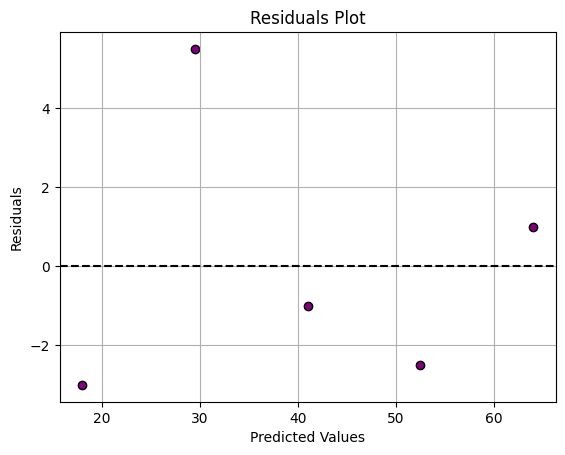

In [11]:
'''Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Step 2: Fit linear regression model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Step 3: Calculate residuals
residuals = Y - Y_pred

# Step 4: Plot residuals
plt.scatter(Y_pred, residuals, color='purple', edgecolor='black')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



'''
Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


To address heteroscedasticity and multicollinearity in a regression model for house price prediction:

1. **Heteroscedasticity:**
    - **Transform the target variable:** Apply log or Box-Cox transformation to the price variable to stabilize variance.
    - **Use robust regression:** Switch to models like HuberRegressor or use robust standard errors.
    - **Weighted least squares:** Assign weights inversely proportional to the variance of errors.

2. **Multicollinearity:**
    - **Check VIF:** Identify highly collinear features using Variance Inflation Factor (VIF).
    - **Remove/reduce correlated features:** Drop or combine features with high VIF.
    - **Regularization:** Use Ridge or Lasso regression to penalize large coefficients and reduce multicollinearity impact.
    - **Principal Component Analysis (PCA):** Transform correlated features into uncorrelated principal components.

3. **General Steps:**
    - **Feature engineering:** Create meaningful, independent features.
    - **Model diagnostics:** Continuously check residuals and VIF after each change.
    - **Cross-validation:** Validate model robustness using cross-validation.

By following these steps, you can mitigate the effects of heteroscedasticity and multicollinearity, leading to a more reliable and interpretable regression model for house price prediction.
'''